In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [4]:
mouse_metadata_path = pd.read_csv(r"C:\Users\cynth\Desktop\Pymaceuticals\data\Mouse_metadata.csv")
study_results_path = pd.read_csv(r"C:\Users\cynth\Desktop\Pymaceuticals\data\Study_results.csv")

In [5]:
mouse_metadata_path.head()
study_results_path.head()
mouse_metadata_path

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
mouse_study=pd.merge(mouse_metadata_path, study_results_path, on = "Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
diff_mice=mouse_study["Mouse ID"].unique()
diff_mice
number_of_mice=len(diff_mice)
number_of_mice

249

In [8]:
duplicate_mice=mouse_study[mouse_study.duplicated(['Mouse ID'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
clean_mice=duplicate_mice.drop_duplicates(subset="Mouse ID", keep="first", inplace=False)
clean_mice
clean_mice_num=clean_mice['Mouse ID'].unique()
clean_mice_num
num_of_clean_mice=len(clean_mice_num)
num_of_clean_mice
gender_clean_mice=clean_mice['Sex'].unique()
gender_clean_mice
gender=len(gender_clean_mice)
gender


2

In [19]:
by_drug=clean_mice.set_index('Drug Regimen').groupby(['Drug Regimen'])
by_drug
average_tumor_volume=by_drug['Tumor Volume (mm3)'].mean()
average_tumor_volume

Drug Regimen
Capomulin    44.266086
Ceftamin     46.503051
Infubinol    46.541247
Ketapril     47.389175
Naftisol     46.796098
Placebo      47.125589
Propriva     47.077791
Ramicane     43.944859
Stelasyn     47.470830
Zoniferol    46.851818
Name: Tumor Volume (mm3), dtype: float64

In [20]:
median_tumor_volume=by_drug['Tumor Volume (mm3)'].median()
median_tumor_volume

Drug Regimen
Capomulin    45.597064
Ceftamin     46.370798
Infubinol    46.870483
Ketapril     47.059664
Naftisol     46.621301
Placebo      46.989764
Propriva     46.847642
Ramicane     45.521875
Stelasyn     47.054185
Zoniferol    46.736212
Name: Tumor Volume (mm3), dtype: float64

In [23]:
variance_tumor_volume=by_drug['Tumor Volume (mm3)'].var()
variance_tumor_volume

Drug Regimen
Capomulin    5.030889
Ceftamin     0.568299
Infubinol    5.689821
Ketapril     1.612964
Naftisol     0.942076
Placebo      1.141526
Propriva     1.482589
Ramicane     5.831150
Stelasyn     1.493585
Zoniferol    0.856853
Name: Tumor Volume (mm3), dtype: float64

In [25]:
standard_dev_tumor= by_drug['Tumor Volume (mm3)'].std()
standard_dev_tumor

Drug Regimen
Capomulin    2.242964
Ceftamin     0.753856
Infubinol    2.385335
Ketapril     1.270025
Naftisol     0.970606
Placebo      1.068422
Propriva     1.217616
Ramicane     2.414777
Stelasyn     1.222123
Zoniferol    0.925664
Name: Tumor Volume (mm3), dtype: float64

In [27]:
SEM_tumor=by_drug['Tumor Volume (mm3)'].sem()
SEM_tumor

Drug Regimen
Capomulin    0.448593
Ceftamin     0.164505
Infubinol    0.477067
Ketapril     0.264819
Naftisol     0.202385
Placebo      0.218091
Propriva     0.248545
Ramicane     0.482955
Stelasyn     0.254830
Zoniferol    0.188950
Name: Tumor Volume (mm3), dtype: float64

In [29]:
drugs_summary_df=pd.DataFrame({"Average Tumor Volume by Drug": average_tumor_volume, "Median Tumor Volume": median_tumor_volume,
                               "Variance Tumor Volume": variance_tumor_volume, "Standard Deviation Tumor Volume": standard_dev_tumor,
                               "SEM Tumor Volume": SEM_tumor
    
})
drugs_summary_df

,Average Tumor Volume by Drug,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593
Ceftamin,46.503051,46.370798,0.568299,0.753856,0.164505
Infubinol,46.541247,46.870483,5.689821,2.385335,0.477067
Ketapril,47.389175,47.059664,1.612964,1.270025,0.264819
Naftisol,46.796098,46.621301,0.942076,0.970606,0.202385
Placebo,47.125589,46.989764,1.141526,1.068422,0.218091
Propriva,47.077791,46.847642,1.482589,1.217616,0.248545
Ramicane,43.944859,45.521875,5.831150,2.414777,0.482955
Stelasyn,47.470830,47.054185,1.493585,1.222123,0.254830


In [48]:
clean_mice_df=pd.merge(drugs_summary_df, clean_mice, on ="Drug Regimen")
clean_mice_df

,Drug Regimen,Average Tumor Volume by Drug,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593,s185,Female,3,17,5,43.878496,0
1,Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593,x401,Female,16,15,5,45.473753,0
2,Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593,m601,Male,22,17,5,41.408591,1
3,Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593,f966,Male,16,17,5,38.796474,0
4,Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593,u364,Male,18,17,5,45.760886,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Zoniferol,46.851818,46.736212,0.856853,0.925664,0.188950,q633,Male,12,25,5,47.183802,0
233,Zoniferol,46.851818,46.736212,0.856853,0.925664,0.188950,s337,Male,14,27,5,46.849852,0
234,Zoniferol,46.851818,46.736212,0.856853,0.925664,0.188950,w140,Female,19,30,5,47.717952,0
235,Zoniferol,46.851818,46.736212,0.856853,0.925664,0.188950,w575,Female,16,28,5,48.913860,1


In [45]:
genders = ["Male", "Female"]
distributions=[2]
colors=["red", "blue"]
explode = (0.1, 0)
print(distributions)

[2]


ValueError: 'label' must be of length 'x'

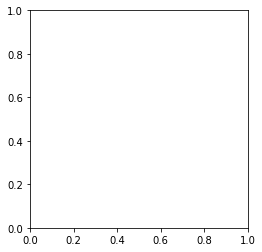